# Banking Customer Churn Prediction

1. Problem Statement:   
The goal of this project is to predict the likelihood of a customer churning, enabling the bank to proactively identify at-risk customers and implement targeted retention strategies. This predictive capability will help the bank improve customer satisfaction, reduce churn rates, and optimize long-term profitability.

2. Data Collection:  
Dataset consists of 14 columns and 1000 rows.

2.1 Import data and required packages: pandas ,Numpy, Matplotlib, seaborn 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the CSV data as pandas DataFrame

In [2]:

df = pd.read_csv('Churn_Modelling.csv')


In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.shape

(10000, 14)

#Dataset Information:   
1.RowNumber: The sequential number assigned to each row in the dataset.   
2.CustomerId: A unique identifier for each customer.    
3.Surname: The surname of the customer.   
4.CreditScore: The credit score of the customer.    
5.Geography: The geographical location of the customer (e.g., country or region).   
6.Gender: The gender of the customer.     
7.Age: The age of the customer.   
8.Tenure: The number of years the customer has been with the bank.    
9.Balance: The account balance of the customer.   
10.NumOfProducts: The number of bank products the customer has.   
11.HasCrCard: Indicates whether the customer has a credit card (binary: yes/no).    
12.IsActiveMember: Indicates whether the customer is an active member (binary: yes/no).   
13.EstimatedSalary: The estimated salary of the customer.   
14.Exited: Indicates whether the customer has exited the bank (binary: yes/no).   

#Data Checks

In [8]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There is no Null value present in dataset.

In [9]:
df.duplicated().sum()

np.int64(0)

Thus no duplicates found.

In [11]:
#Null values and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
#checking the no. of unique vals for each col
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

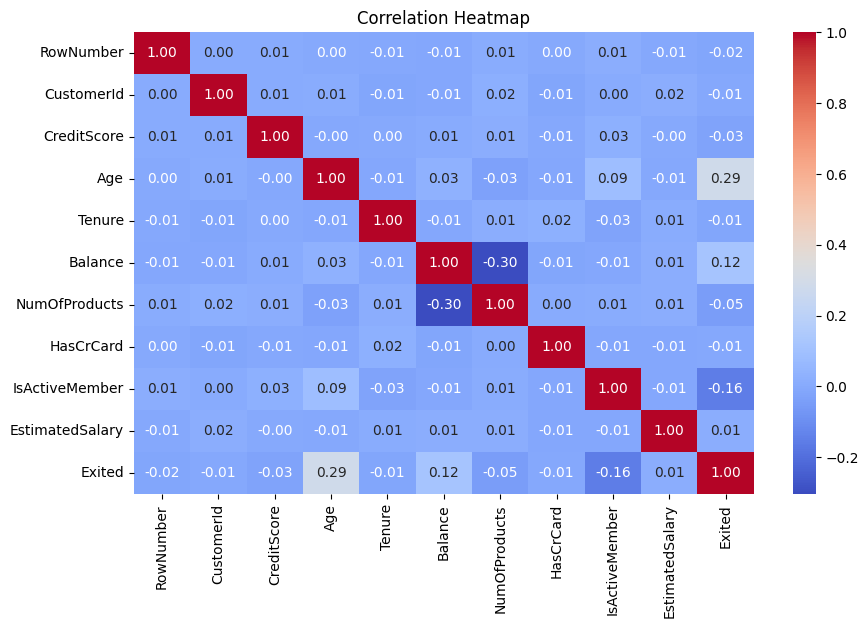

In [45]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Insight's:
 -Older customers tend to churn more Age 0.29.
 -Inactive members are more likely to churn -0.16.

features to be focussed:
Age
IsActiveMember
Balance

Other features like:
CreditScore
NumOfProducts
Tenure
Geography & Gender (after encoding)

Check statistics of data

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [15]:
#define categorical and numerical featues
numeric_features=[feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features=[feature for feature in df.columns if df[feature].dtype == 'O']

#print columns
print('We have {} numerical features : {}'.format(len(numeric_features),numeric_features))
print('We have {} categorical features : {}'.format(len(categorical_features),categorical_features))

We have 11 numerical features : ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
We have 3 categorical features : ['Surname', 'Geography', 'Gender']


#Exploring Data (Visualization)

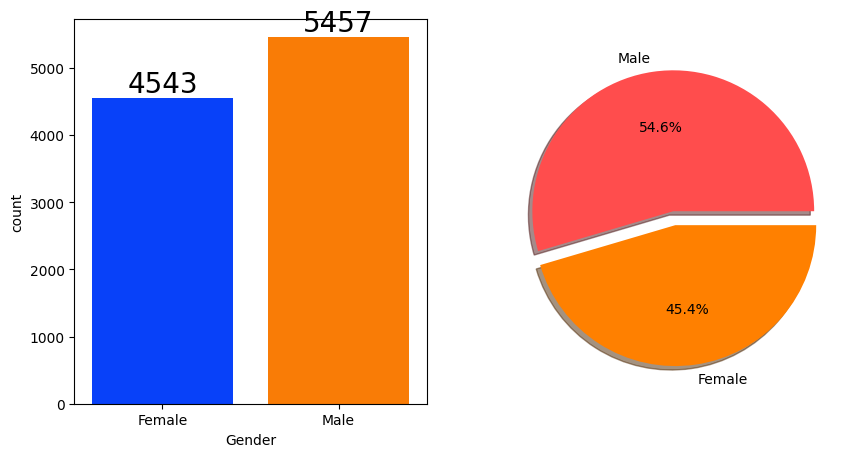

In [11]:
#How is distribution of gender?
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(x=df['Gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['Gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

The above graph shows that we have male members(5457- 54.6%) more than female members (4543- 45.4%).

        IsActiveMember
Gender                
Female            4543
Male              5457


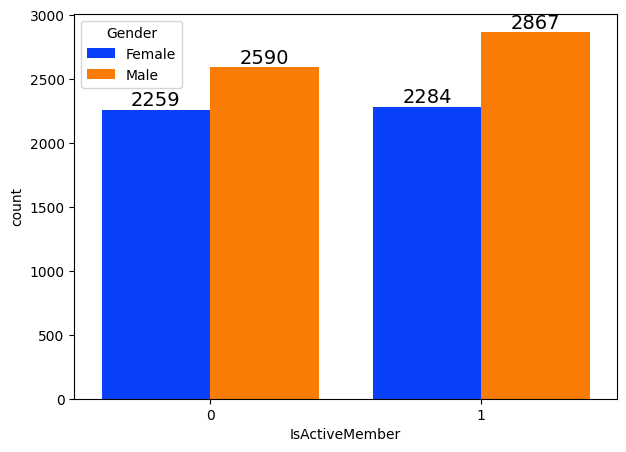

In [10]:
gender_group = df.groupby('Gender')[['IsActiveMember']].count()
print(gender_group)


plt.figure(figsize=(7,5))
sns.countplot(x='IsActiveMember', data=df, hue='Gender', palette='bright', saturation=0.95)

# Add labels to the bars
ax = plt.gca()  # Get current axis
for container in ax.containers:
    ax.bar_label(container, color='black', size=14)

plt.show()

The graph shows that we have active members males (2867) more than females (2284).  

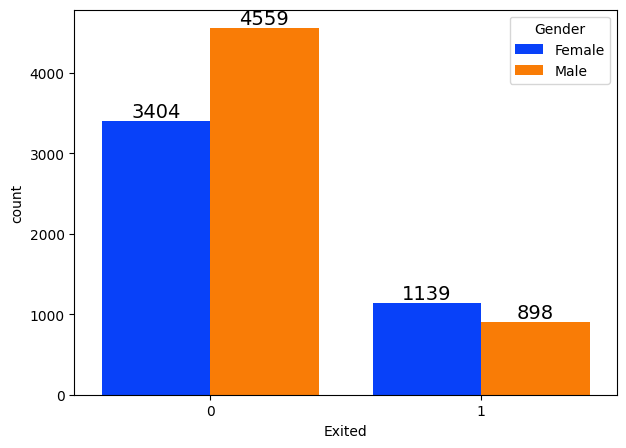

In [8]:
plt.figure(figsize=(7,5))
sns.countplot(x='Exited', data=df, hue='Gender', palette='bright', saturation=0.95)

# Add labels to the bars
ax = plt.gca()  # Get current axis
for container in ax.containers:
    ax.bar_label(container, color='black', size=14)

plt.show()


Insights:
 -Exited females(1139) are more than males(898).
 -Not Exited males are 4559 where as females are less i.e. 3404
 Thus Females tend to churn slightly more than males.

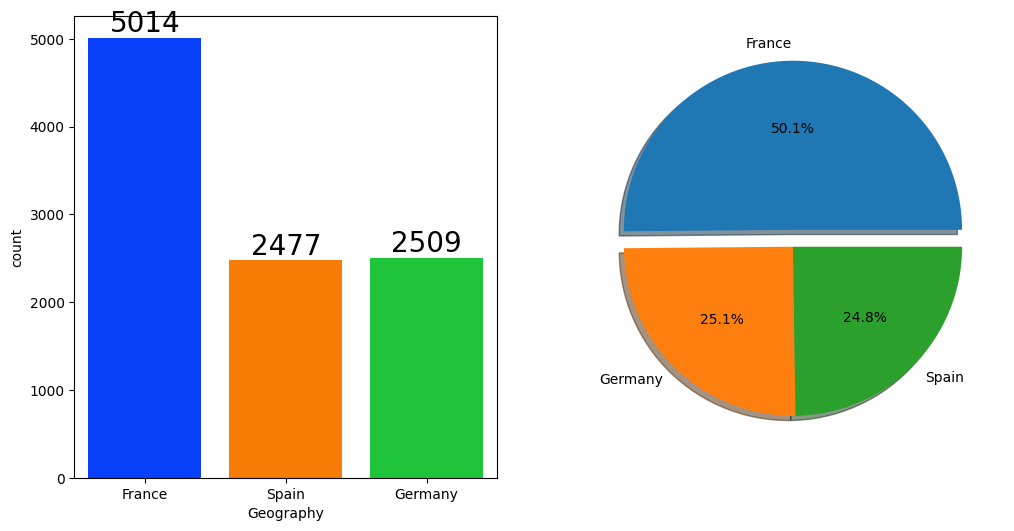

In [43]:
#How is geographical distribution?
f,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot(x=df['Geography'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['Geography'].value_counts(),labels=df['Geography'].value_counts().index,explode=[0.1,0,0],autopct='%1.1f%%',shadow=True)
plt.show()  

Insights:
 -We have maximum members from France (5014) than from Spain (2477) and least from Germany (2509).

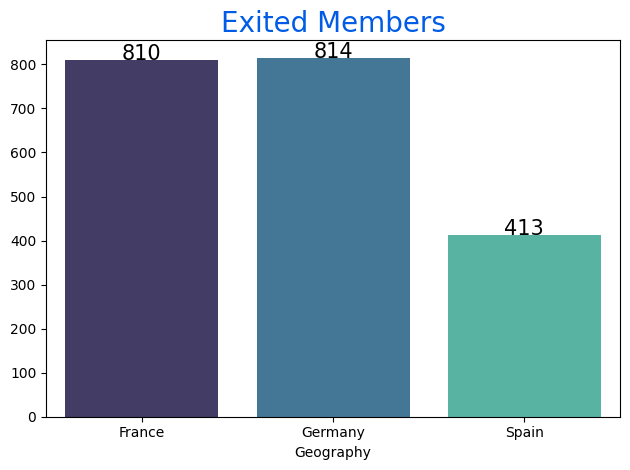

In [12]:
#How geography have impact on Exited member's?
# Group by Geography
Group_data2 = df.groupby('Geography')
exited_counts = Group_data2['Exited'].sum()


sns.barplot(x=exited_counts.index, y=exited_counts.values, palette='mako')
plt.title('Exited Members', color='#005ce6', size=20)
for i, val in enumerate(exited_counts.values):
    plt.text(i, val + 0.05, str(val), ha='center', color='black', size=15)
plt.tight_layout()
plt.show()

Insight's:
-We have most exited members from Germany(814) than from France(810) and spain(413).

We have maximum member's from France(5014) and least from germany(2509) but have most Exited from Germany(814).

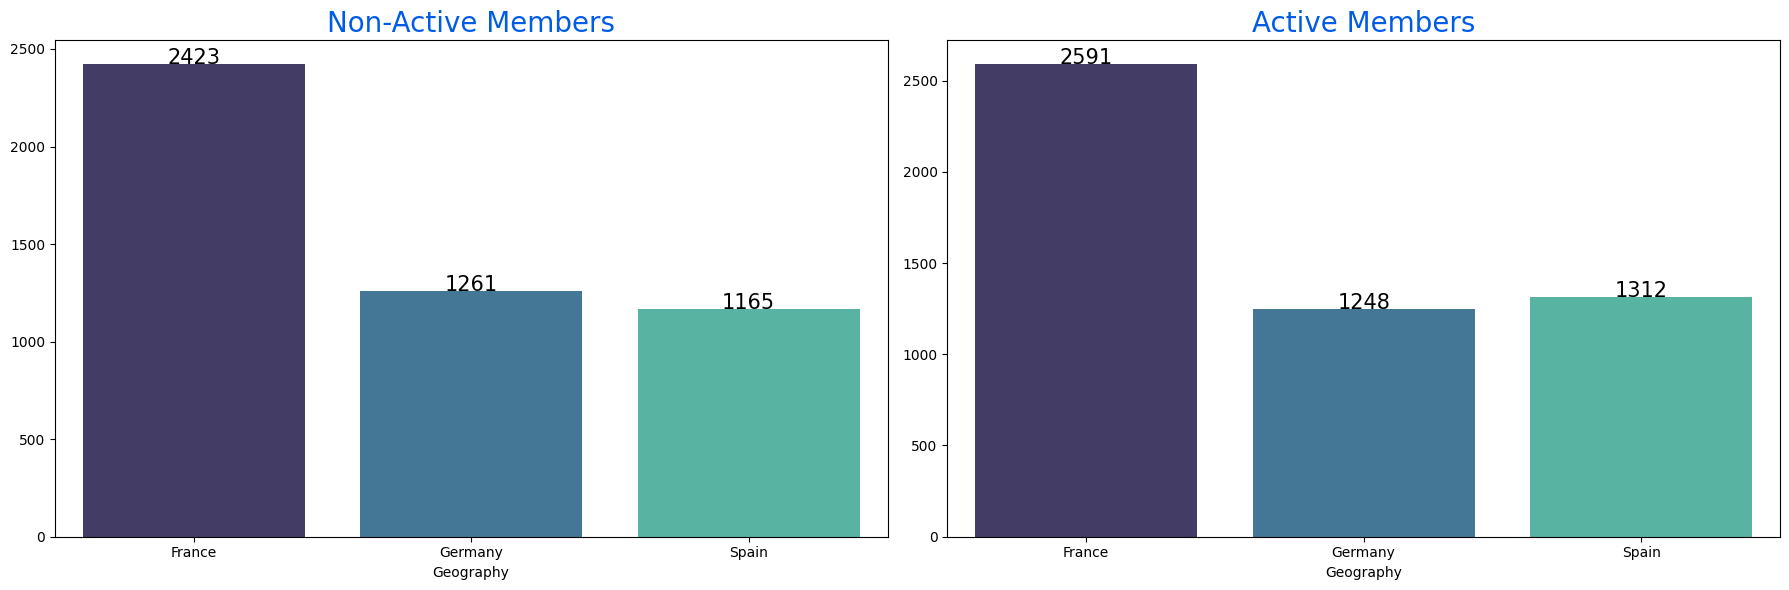

In [55]:
#How geography have impact on active member's?
# Group by Geography
Group_data2 = df.groupby('Geography')

# Calculate active and non-active members
active_counts = Group_data2['IsActiveMember'].sum()
non_active_counts = Group_data2['IsActiveMember'].apply(lambda x: (x == 0).sum())

# Create 2 subplots
f, ax = plt.subplots(1, 2, figsize=(18,6))

# Non-Active Members
sns.barplot(x=non_active_counts.index, y=non_active_counts.values, palette='mako', ax=ax[0])
ax[0].set_title('Non-Active Members', color='#005ce6', size=20)
for i, val in enumerate(non_active_counts.values):
    ax[0].text(i, val + 0.05, str(val), ha='center', color='black', size=15)

# Active Members 
sns.barplot(x=active_counts.index, y=active_counts.values, palette='mako', ax=ax[1])
ax[1].set_title('Active Members', color='#005ce6', size=20)
for i, val in enumerate(active_counts.values):
    ax[1].text(i, val + 0.05, str(val), ha='center', color='black', size=15)


plt.tight_layout()
plt.show()


Insight's:
 -france(2591) have highest no of members that are active than germany(1248) and spain(1312).
 -France(2423) has highest non active members but Germany has more non active members than the active members i.e.-13.

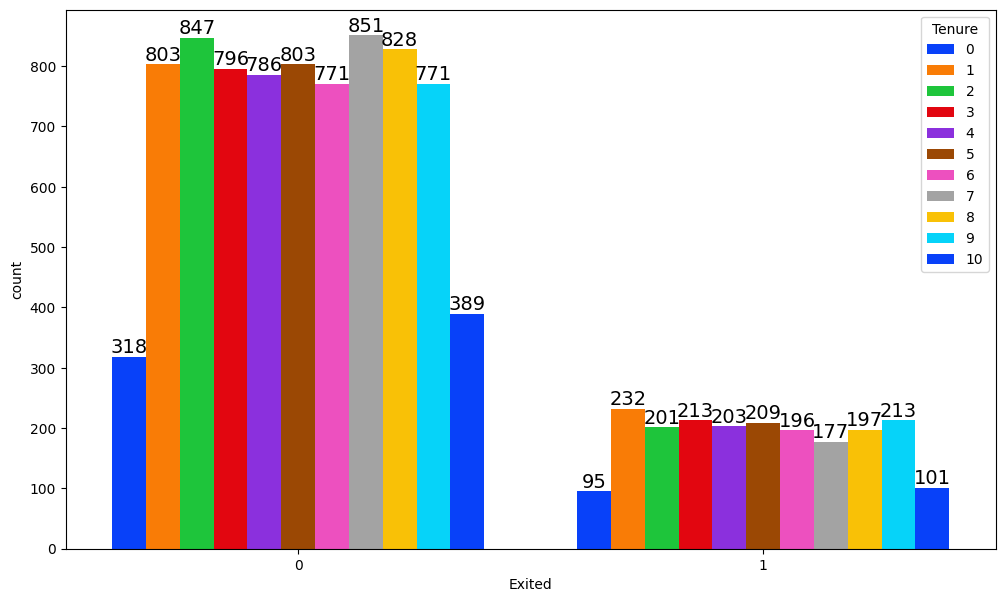

In [17]:
#How is Tenure affect's churn?    
plt.figure(figsize=(12,7))
sns.countplot(x='Exited', data=df, hue='Tenure', palette='bright', saturation=0.95)

ax = plt.gca()  # Get current axis
for container in ax.containers:
    ax.bar_label(container, color='black', size=14)

plt.show()


Insight's:
 -For every tenure value (0–10), the counts for Not-Exited are much higher than Exited.
 -Customers with longer tenure are less likely to leave (for tenure 2-10).
 -At tenure = 0 and 1, churn numbers are still smaller than non-churn, but

Tenure 0: 318 (no churn) vs 95 (churn)
Tenure 1: 803 (no churn) vs 232 (churn)
This shows people who are new to the service are more likely to churn compared to long-term customers.

-Tenure beyond the first year gradually stabilizes customer loyalty.

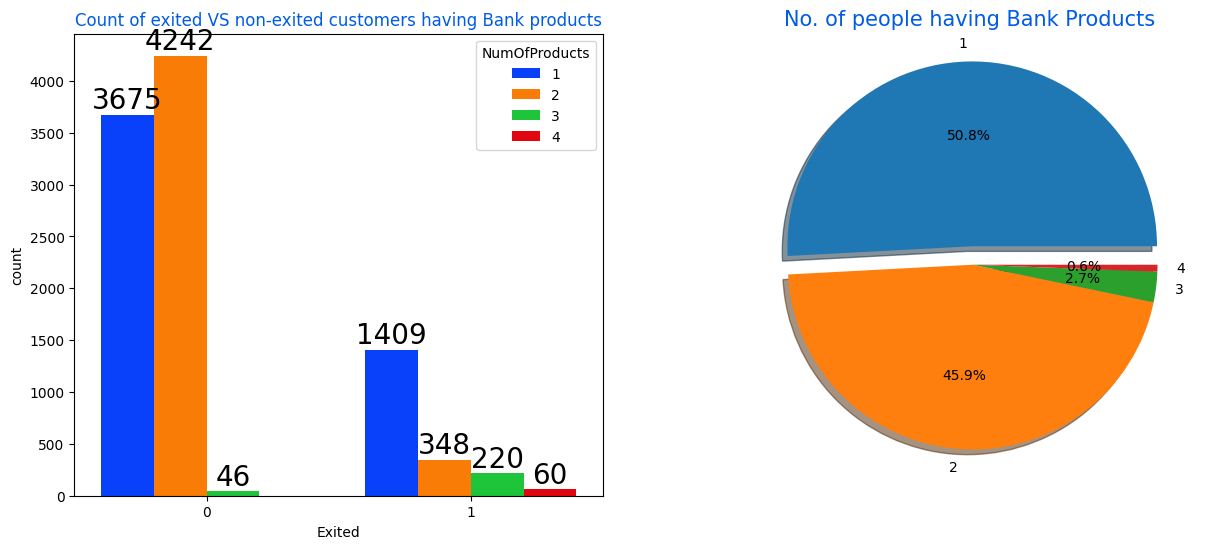

In [37]:
#How Number of products affect's churn?    
f,ax=plt.subplots(1,2,figsize=(15,6))


sns.countplot(x=df['Exited'], data=df, hue='NumOfProducts', palette='bright',ax=ax[0], saturation=0.95)
ax[0].set_title('Count of exited VS non-exited customers having Bank products', color='#005ce6', size=12)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)


plt.pie(x = df['NumOfProducts'].value_counts(),labels=df['NumOfProducts'].value_counts().index,explode=[0.1,0,0,0],autopct='%1.1f%%',shadow=True)
ax[1].set_title('No. of people having Bank Products ', color='#005ce6', size=15)
    
plt.show()  

Insight's
 -Almost half of customers(50.8%) are having only 1 bank product whereas very less customers are having 4 or 3 products i.e. 0.6% and 2.7%.
 
 -From these the customer's having 4 or 3 products are more to exit i.e. 60 and 220 rather than staying.
 -The customer's having 2 bank products are more likely to stay as compared to exit.


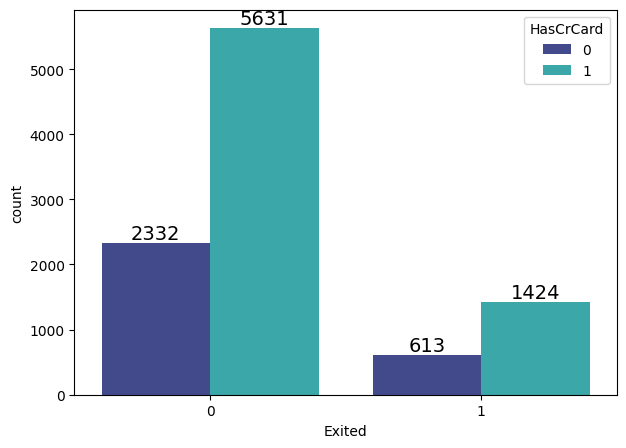

In [40]:
#How having Credit card have impact on Exited member's?
plt.figure(figsize=(7,5))
sns.countplot(x='Exited', data=df, hue='HasCrCard', palette='mako', saturation=0.95)

# Add labels to the bars
ax = plt.gca()  # Get current axis
for container in ax.containers:
    ax.bar_label(container, color='black', size=14)

plt.show()


Insight's:
 -The customers having credit card are churning more i.e. 1424 as compared to not having one's.

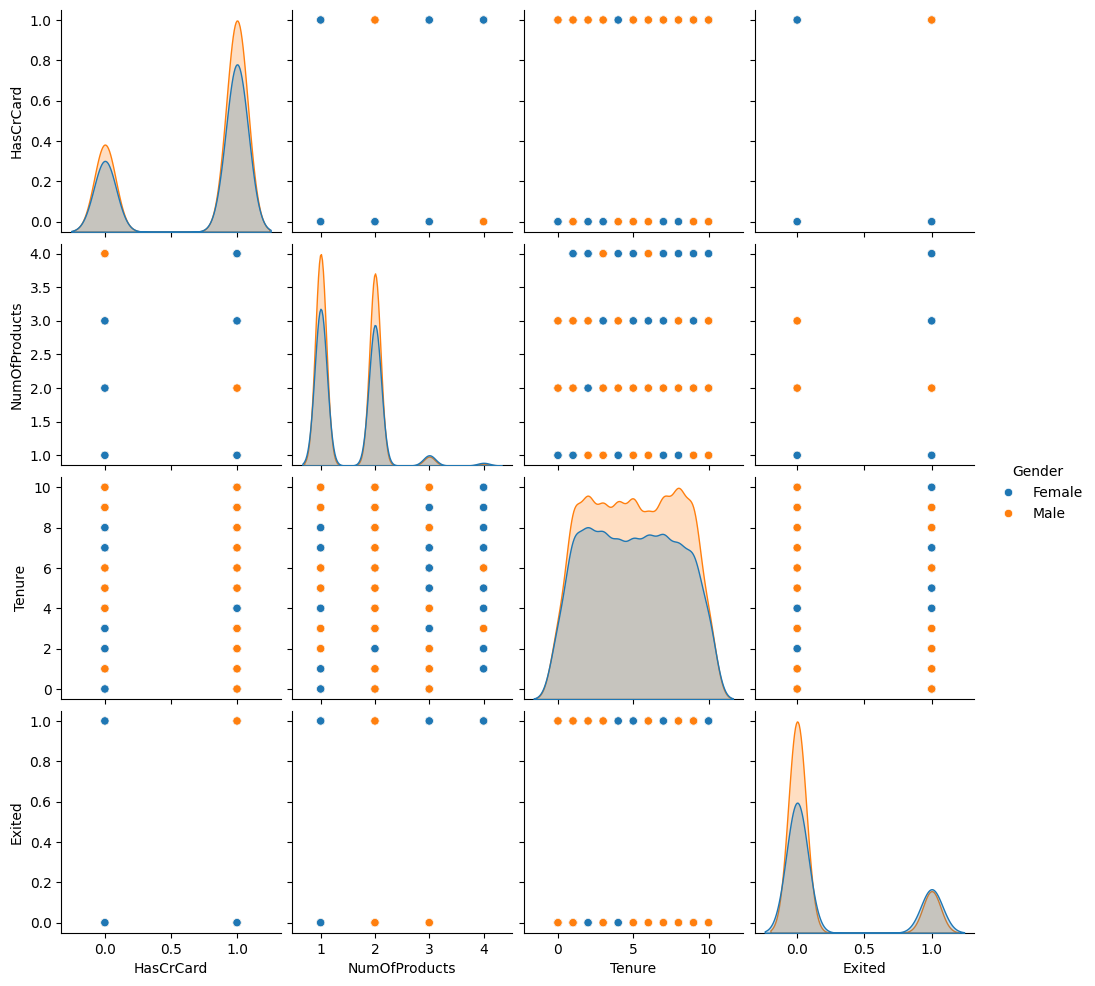

In [43]:
new_df = df[['Gender','HasCrCard','NumOfProducts', 'Tenure', 'Exited']]
#MUTIVARIATE ANALYSIS USING PAIRPLOT
sns.pairplot(new_df,hue = 'Gender')
plt.show()
